## Observations and Insights 

# The study used almost equal number of female 49% and male 53% mice.
# Campomulin and Ramicane showed the greates success rate of tumor reduction. 
# Weight is showen to be a factor in size of tumor with mice that weigh more having lager tumers

In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = mouse_metadata_df.merge(study_results_df)

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [285]:
# Checkind the number of mice.
mice_number_df = combined_data_df.loc[:,["Mouse ID"]]
num_mice = mice_number_df.count()[0]
pd.DataFrame({"Number of Mice": [num_mice]})

,Number of Mice
0,1893


In [286]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [287]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data_df[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [288]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_df)==False]
clean_mouse_df = clean_mouse_df.round(2)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [289]:
# Checking the number of mice in the clean DataFrame.
mice_num_clean_df = len(clean_mouse_df["Mouse ID"].unique())
mice_num_clean_df

248

## Summary Statistics

In [290]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = clean_mouse_df.loc[:,["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
ss_mean = summary_statistics_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
ss_median = summary_statistics_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
ss_variance = summary_statistics_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
ss_std = summary_statistics_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
ss_sem = summary_statistics_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistic_analysis = pd.DataFrame({"Tumor Volume Mean": ss_mean, "Tumor Volume Median": ss_median, "Tumor Volume Variance": ss_variance,"Tumor Volume Standard Deviation": ss_std, "Tumor Volume SEM": ss_sem})
summary_statistic_analysis=summary_statistic_analysis.round(2)
summary_statistic_analysis
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.56,8.28,0.60
Naftisol,54.33,52.50,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.44,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = clean_mouse_df.loc[:,["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
ss_mean = summary_statistics_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
# This method produces everything in a single groupby function
ss_mean=ss_mean.round(2)
ss_mean

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.56  8.28  0.60
Naftisol                  54.33  52.50  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.44  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

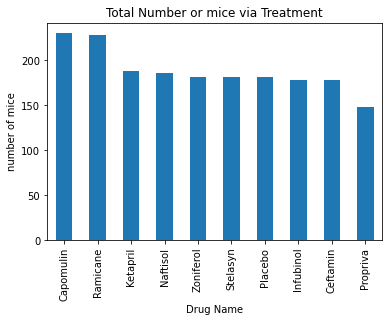

In [292]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_num_mice = clean_mouse_df["Drug Regimen"].value_counts()
y_axis = treatment_num_mice.values
x_axis = treatment_num_mice.index

treatment_num_mice.plot(kind="bar")

plt.title("Total Number or mice via Treatment")
plt.ylabel("number of mice")
plt.xlabel("Drug Name")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

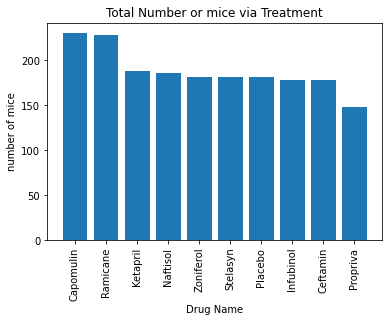

In [293]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice_treatment = clean_mouse_df["Drug Regimen"].value_counts()
y_axis = num_mice_treatment.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = num_mice_treatment.index

plt.bar(x_drugs, y_axis,align="center")

plt.title("Total Number or mice via Treatment")
plt.ylabel("number of mice")
plt.xlabel("Drug Name")
plt.xticks(rotation=90)
plt.show


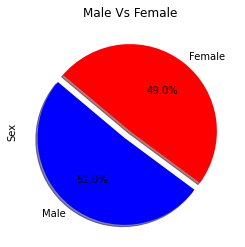

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_v_female = clean_mouse_df["Sex"].value_counts()
labels = male_v_female.values
sizes = male_v_female.index
colors = ["blue", "red"]
explode = (0.1,0)
male_v_female.plot(kind="pie", explode=explode, colors=colors, autopct= "%1.1f%%", shadow = True, startangle=140)
plt.title("Male Vs Female")
plt.show()


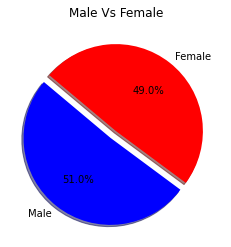

In [295]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female = clean_mouse_df["Sex"].value_counts()
labels = male_v_female.index
sizes = male_v_female.values
colors = ["blue", "red"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle=140)
plt.title("Male Vs Female")
plt.show()


## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tv_df = clean_mouse_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_final_tv = final_tv_df[["Mouse ID", "Timepoint"]].merge(clean_mouse_df, on = ["Mouse ID", "Timepoint"])
combined_final_tv = combined_final_tv.round(2)
combined_final_tv

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [297]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
ram_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Ramicane", :]
inf_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Infubinol", :]
ceft_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Ceftamin", :]

In [298]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [299]:
capomulin = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(capomulin)
cap_merge = pd.merge(cap_vol, combined_data_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [300]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


cap_tumor = cap_merge["Tumor Volume (mm3)"]

quartile_cap= cap_tumor.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap= quartile_cap[.75]
iqr= upper_cap-lower_cap
lower_cap_out=lower_cap-(1.5*iqr)
upper_cap_out=upper_cap+(1.5*iqr)


In [301]:
ramicane = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ramicane)
ram_merge = pd.merge(ram_vol, combined_data_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [302]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
ram_tumor = ram_merge["Tumor Volume (mm3)"]

quartile_ram= ram_tumor.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram= quartile_ram[.75]
iqr= upper_ram-lower_ram
lower_ram_out=lower_ram-(1.5*iqr)
upper_ram_out=upper_ram+(1.5*iqr)


In [303]:
infubinol = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_vol = pd.DataFrame(infubinol)
inf_merge = pd.merge(inf_vol, combined_data_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [304]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
inf_tumor = inf_merge["Tumor Volume (mm3)"]

quartile_inf= inf_tumor.quantile([.25,.5,.75])
lower_inf= quartile_inf[.25]
upper_inf= quartile_inf[.75]
iqr= upper_inf-lower_inf
lower_inf_out=lower_inf-(1.5*iqr)
upper_inf_out=upper_inf+(1.5*iqr)


In [305]:
ceftamin = ceft_df.groupby('Mouse ID').max()['Timepoint']
cef_vol = pd.DataFrame(ceftamin)
cef_merge = pd.merge(cef_vol, combined_data_df, on=("Mouse ID","Timepoint"),how="left")
cef_merge.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [306]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
cef_tumor = cef_merge["Tumor Volume (mm3)"]

quartile_cef= cef_tumor.quantile([.25,.5,.75])
lower_cef= quartile_cef[.25]
upper_cef= quartile_cef[.75]
iqr= upper_cef-lower_cef
lower_cef_out=lower_cef-(1.5*iqr)
upper_cef_out=upper_cef+(1.5*iqr)


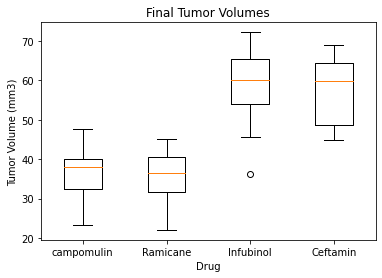

In [307]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

plt.boxplot(plot_data, labels=["campomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug")
plt.show()

## Line and Scatter Plots

In [308]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "r554"]
cap_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
125,r554,Capomulin,Female,8,17,0,45.000000,0
126,r554,Capomulin,Female,8,17,5,45.781746,1
127,r554,Capomulin,Female,8,17,10,39.005494,2
128,r554,Capomulin,Female,8,17,15,35.463758,2
129,r554,Capomulin,Female,8,17,20,36.015589,2


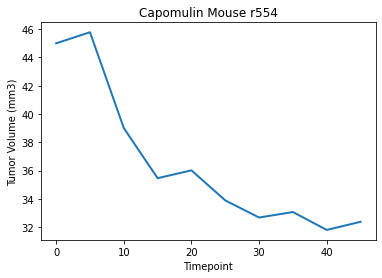

In [309]:
x_axis = cap_mouse_df["Timepoint"]
tumor_vol = cap_mouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin Mouse r554")
plt.plot(x_axis,tumor_vol,linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("linechart")
plt.show()

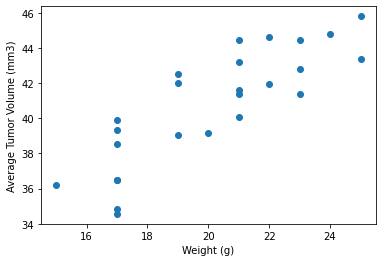

In [310]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_wt = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_mouse_wt['Weight (g)'],cap_mouse_wt['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [315]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(cap_mouse_wt['Weight (g)'],cap_mouse_wt['Tumor Volume (mm3)'])[0],2)


In [316]:
model = st.linregress(cap_mouse_wt["Weight (g)"],cap_mouse_wt["Tumor Volume (mm3)"])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [317]:
slope = 1.750545158665582
intercept = 1.4466314076484892

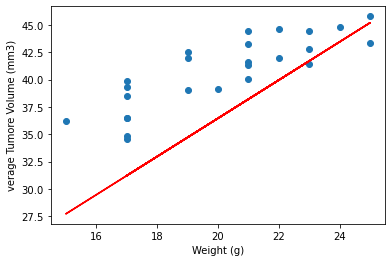

In [318]:
y_values = cap_mouse_wt["Weight (g)"]*slope+intercept
plt.scatter(cap_mouse_wt["Weight (g)"],cap_mouse_wt["Tumor Volume (mm3)"])
plt.plot(cap_mouse_wt["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("verage Tumore Volume (mm3)")

plt.savefig("LRM")
plt.show()
